# Tarea
## Edison H
## Las tareas a realizar son las siguientes:
Preprocesar los datos del corpus de acuerdo a las sugerencias desarrolladas por wguillen [github].

Aplicar la técnicas de los vecinos más cercanos indicada en clase y empleando la fórmula propuesta por wguillen.

Desarrollar una pequeña interfaz en Python u otro lenguaje donde se coloquen los atributos y el sistema indique la calidad del vino.

Realizar un pequeño informe del trabajo desarrollado, considerando los aspectos principales y qué tan preciso es el sistema.
## Desarollo
## Proseso de los datos 

In [55]:


# Importar las librerias para el analasis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## datos extraidos

In [49]:

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df = pd.read_csv(r"winequality-red.csv",sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Graficas de las cualidades del vino

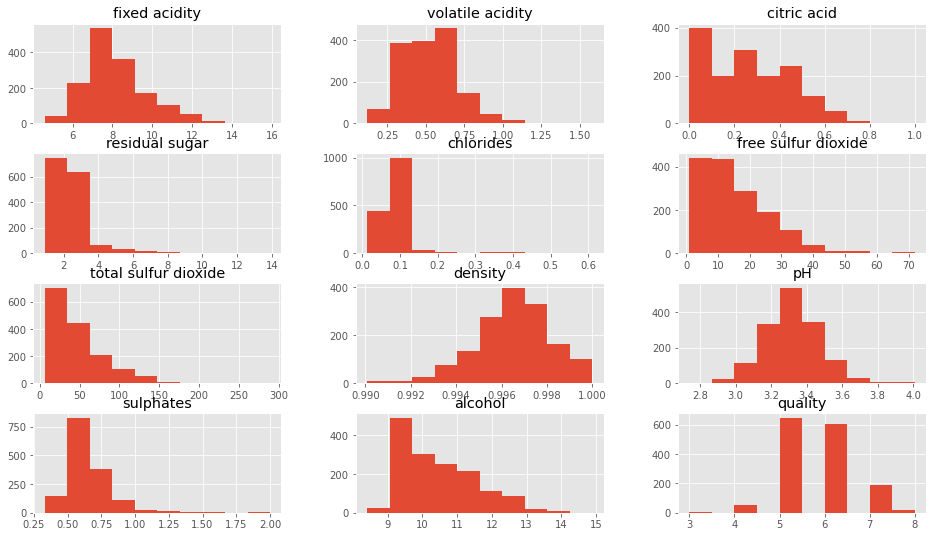

In [50]:
df.hist()
plt.show()


En esta seccion se visualiza de manera estadística el nivel de calidad entre los vinos, dando una escala desde 0 a 8 entre la calidad y la cantidad de vinos  con el nivel de calidad


C:\Users\edison\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\edison\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


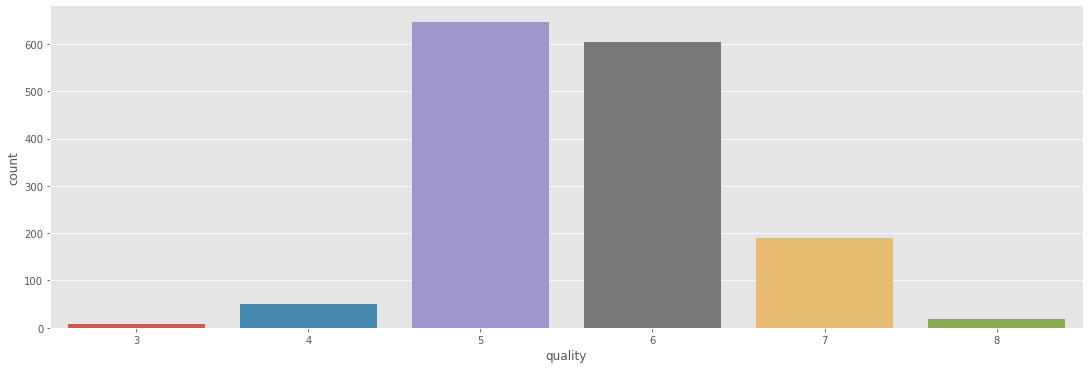

In [51]:
sb.factorplot('quality',data=df,kind="count", aspect=3)

En esta seccion se puede visualisar de manera estadística el nivel de la ausencia de dióxido de sulfato entre los vinos dando el nivel del sulfato en el eje x ( free sulfur dioxide), y la cantidad de vinos (count) en el eje y

C:\Users\edison\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\edison\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


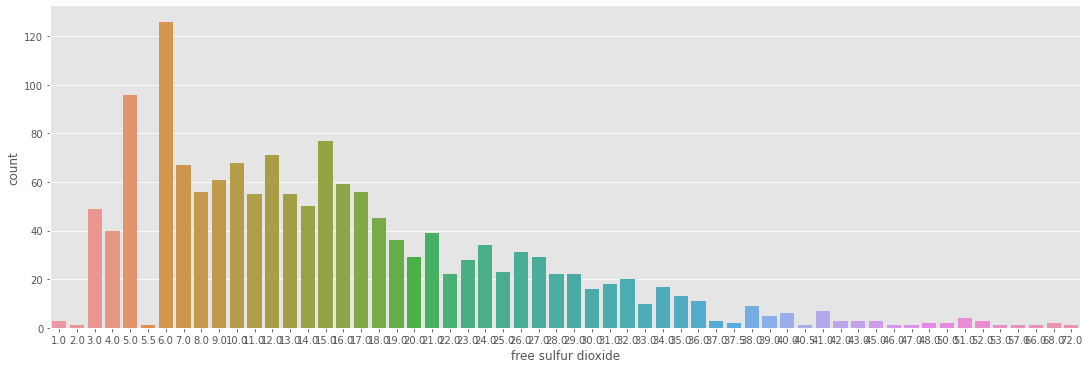

In [53]:
sb.factorplot('free sulfur dioxide',data=df,kind="count", aspect=3)

En esta seccion prosedemos a crear  el data set con el cual trabajaremos para el entrenaiento de algoritmo

In [56]:

X = df[['alcohol','free sulfur dioxide']].values 
y = df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [59]:

n_neighbors = 10

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Precisión del clasificador K-NN en el conjunto de entrenamiento: '
     .format(knn.score(X_train, y_train)))
print('Precisión del clasificador K-NN en el conjunto de prueba:'
     .format(knn.score(X_test, y_test)))



Precisión del clasificador K-NN en el conjunto de entrenamiento: 0.63
Precisión del clasificador K-NN en el conjunto de prueba: 0.54


In [58]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  1   6   5   0   0]
 [  2 122  45   1   0]
 [  0  63  74  14   0]
 [  0  14  21   7   0]
 [  1   0   3   1   0]]
              precision    recall  f1-score   support

           4       0.25      0.08      0.12        12
           5       0.60      0.72      0.65       170
           6       0.50      0.49      0.49       151
           7       0.30      0.17      0.22        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       380
   macro avg       0.33      0.29      0.30       380
weighted avg       0.51      0.54      0.52       380



C:\Users\edison\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Generamos la gráfica de todo los vesinos mas sercanos


<ipython-input-60-ea5d27af7834>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


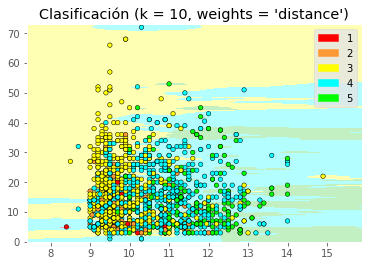

In [60]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("Clasificación (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()



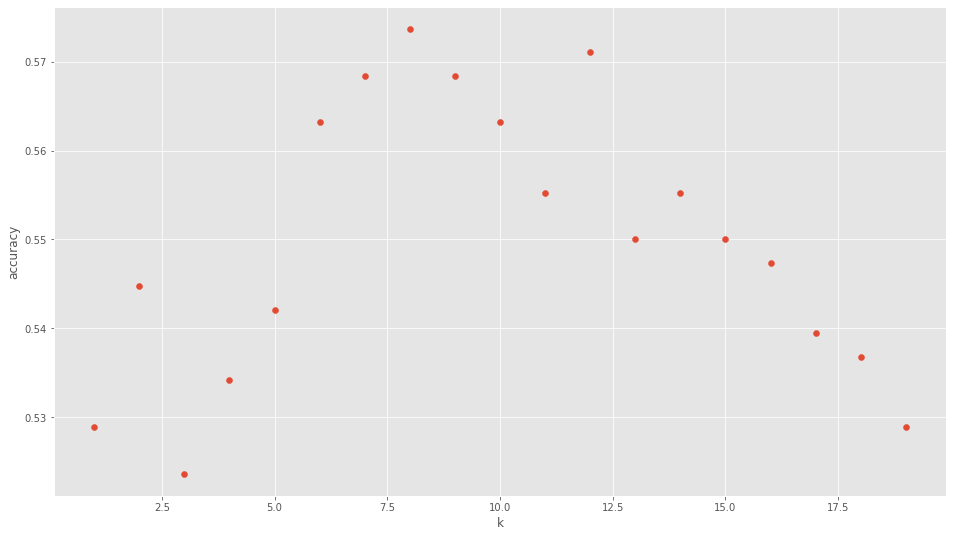

In [12]:


k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)



Teniendo ahora los valores de correlación entre la calidad y las otras características, echemos un vistazo a la matriz de correlación para tener una mejor comprensión de cómo las características se correlacionan entre sí.
A continuación, se vera las correlaciones entre las variables . Esto permite comprender mucho mejor las relaciones entre las variables en un vistazo rápido.

Inmediatamente,se puede apresiar ver que hay algunas variables que están fuertemente correlacionadas con la calidad. Es probable que estas variables también sean las características más importantes de nuestro modelo de aprendizaje automático


<AxesSubplot:>

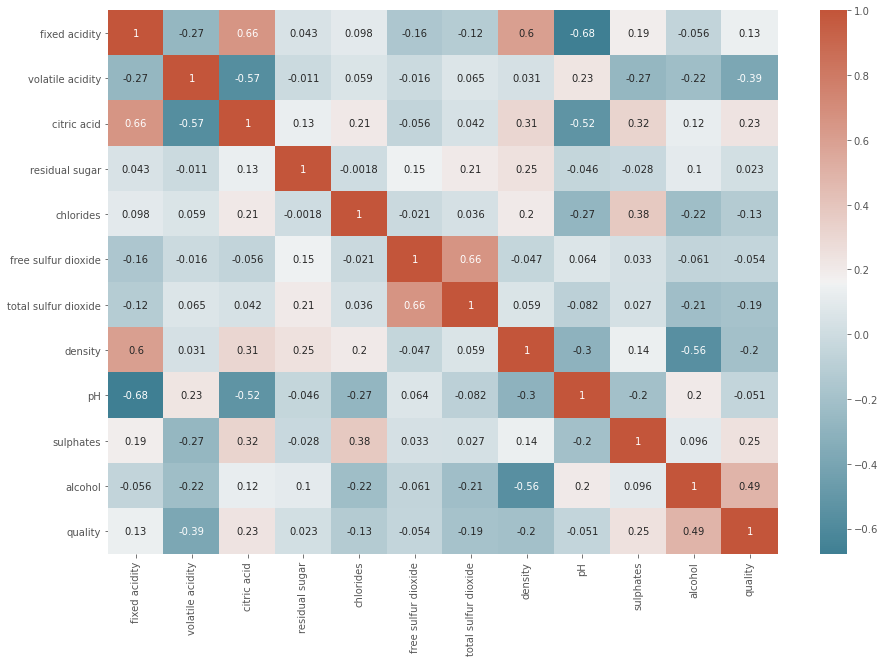

In [106]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

corr = df.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [102]:
! pip install plotly-express

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=155c23ffd4efc1cd98a7875b273661486e3692ccaaf3bfd289ed4aadaa0273c8
  Stored in directory: c:\users\edison\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [13]:
print(clf.predict([[90, 15]]))

[7]


## Desarollo de la parte grafica

In [160]:
from tkinter import * # Carga módulo tk (widgets estándar)
from tkinter import ttk # Carga ttk (para widgets nuevos 8.5+)
from tkinter import messagebox
import pandas as pd
import operator
import csv
import os
principal = Tk()

def analizar():
    newWindows=Tk()
    newWindows.title("Tabla de Similitud")
    df = pd.read_csv('winequality-red.csv')
    vinos = [list(row) for row in df.values]
    similares={}
    cn=[float(tfa.get()),float(tva.get()),float(tca.get()),float(trs.get()),
    float(tc.get()),float(tfsd.get()),float(ttsd.get()),float(td.get()),
    float(tph.get()),float(ts.get()),float(ta.get())]
    minimo=[4.6,0.12,0,0.9,0.012,1,6,0.99,2.74,0.33,8.4]
    maximo=[15.9,1.58,1.0,13.9,0.611,72.0,289.0,1.0,4.01,2.0,14.9]
    weight=[float(ctfa.get()),float(ctva.get()),float(ctca.get()),float(ctrs.get()),float(ctc.get())
            ,float(ctfsd.get()),float(cttsd.get()),float(ctd.get()),float(ctph.get()),float(cts.get())
            ,float(cta.get())]

def similitud(ce):
    valor=0
    for i in range(len(minimo)):
        valor+= weight[i] * (1-((abs(ce[i]-cn[i]))/(maximo[i]-minimo[i])))
        
    return valor/sum(weight)
    for i in range(len(vinos)):
        fila=[]
        fila=vinos[i]
        x = similitud(fila)
        similares.update({str(i):round(x,3)})
    order = dict(sorted(similares.items(), key=operator.itemgetter(1)))
    cols=("#Vino", "Acidez Fija", "Acidez Volatil", "Acido Citrico","Azucar Residual","Choruros","Dioxido de Azufre Libre","Total Dióxido de azufre","Densitad","PH","Sulfatos","Alcohol","Calificacion","Similitud")
    tree = ttk.Treeview(newWindows,columns=cols,show='headings')
    vsb = ttk.Scrollbar(newWindows, orient="vertical", command=tree.yview)
    vsb.pack(side=RIGHT, fill=BOTH)
    tree.configure(yscrollcommand=vsb.set)
    for i in range(len(cols)):
        tree.heading(cols[i],text=cols[i])
        tree.column(cols[i], minwidth=0, width=50)
    tree.pack(expand=YES, fill=BOTH)
    tam=len(orden)
    for i in range(tam):
        pos=int(list(orden.items())[i][0])
        c1=vinos[int(pos)][0]
        c2=vinos[int(pos)][1]
        c3=vinos[int(pos)][2]
        c4=vinos[int(pos)][3]
        c5=vinos[int(pos)][4]
        c6=vinos[int(pos)][5]
        c7=vinos[int(pos)][6]
        c8=vinos[int(pos)][7]
        c9=vinos[int(pos)][8]
        c10=vinos[int(pos)][9]
        c11=vinos[int(pos)][10]
        c12=vinos[int(pos)][11]
        sim=str(list(orden.items())[i][1])
        tree.insert("",0,i,values=(str(pos),c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,sim))
        #print("Item Mas Similar")
        fpos=list(orden.items())[tam-1][0]
        fval=list(orden.items())[tam-1][1]
        res=vinos[int(fpos)][11]
        
        li=[cn[0],cn[1],cn[2],cn[3],cn[4],cn[5],cn[6],cn[7],cn[8],cn[9],cn[10],res]
        if li in vinos:
            messagebox.showinfo(message="Calificacion: " + res + "/n "+" Similitud: "+str(fval))
        else:  
            with open('winequality-red-Copy1.csv','a') as f:
                writer = csv.writer(f)
                writer.writerow((li))
            messagebox.showinfo(message="Calificacion: " + res + "/n "+"Similitud: "+str(fval))
lista =[0,1,2,3,4,5,6,7,8,9,10]



In [161]:
principal.geometry('700x325') # anchura x altura
principal.title('APLICACION VINOS')
principal.config(bg="red")
Label(principal,bg="red",text="ANALISIS DE VINOS ROJOS").place(x=240,y=0)
Label(principal,bg="red",text="Fixed Acidy",font="Courier 8").place(x=0,y=25)
fa = Spinbox(principal, from_=4.6, to=15.9 , width=5,increment=0.1,font='Courier12')
fa.place(x=150,y=25)
cfa = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
cfa.place(x=225, y=25)
cfa.current(3)
Label(principal,bg="red",text="Volatily Acidy",font="Courier 8").place(x=308,y=25)
tva = Spinbox(principal, from_=0.12, to=1.58 ,width=5,increment=0.01,font='Courier 12')
tva.place(x=450 ,y=25)
ctva = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
ctva.place(x=525, y=25)
ctva.current(3)
Label(principal,bg="red",text="Citric Acid",font="Courier 8").place(x=0,y=50)
tca = Spinbox(principal, from_=0.0, to=1.0 , width=5,increment=0.1,font='Courier12')
tca.place(x=150 ,y=50)
ctca = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
ctca.place(x=225, y=50)
ctca.current(3)
Label(principal,bg="red",text="Residual Sugar",font="Courier 8").place(x=308,y=50)
trs = Spinbox(principal, from_=0.9, to=13.9 ,
width=5,increment=0.1,font='Courier 12')
trs.place(x=450 ,y=50)
ctrs = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
ctrs.place(x=525, y=50)
ctrs.current(5)
Label(principal,bg="red",text="Chlorides",font="Courier 8").place(x=0,y=75)
tc = Spinbox(principal, from_=0.012, to=0.611 ,
width=5,increment=0.001,font='Courier 12')
tc.place(x=150 ,y=75)
ctc = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
ctc.place(x=225, y=75)
ctc.current(1)
Label(principal,bg="red",text="Free Sulfur Dioxide",font="Courier 8").place(x=308,y=75)
tfsd = Spinbox(principal, from_=1.0, to=72.0 ,
width=5,increment=1.0,font='Courier 12')
tfsd.place(x=450 ,y=75)
ctfsd = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
ctfsd.place(x=525, y=75)
ctfsd.current(1)
Label(principal,bg="red",text="Total Sulfure Dioxide",font="Courier8").place(x=0,y=100)
ttsd = Spinbox(principal, from_=6.0, to=289.0 ,
width=5,increment=1,font='Courier 12')
ttsd.place(x=150 ,y=100)
cttsd = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
cttsd.place(x=225, y=100)
cttsd.current(1)
Label(principal,bg="red",text="Density",font="Courier 8").place(x= 308,y=100)
td= Spinbox(principal, from_=0.9900, to=1.0000 ,
width=6,increment=0.0001,font='Courier 12')
td.place(x=450 ,y=100)
ctd = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
ctd.place(x=525, y=100)
ctd.current(1)
Label(principal,bg="red",text="pH",font="Courier 8").place(x=0,y=125)
tph = Spinbox(principal, from_=2.74, to=4.01 ,
width=5,increment=0.01,font='Courier 12')
tph.place(x=150 ,y=125)
ctph = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
ctph.place(x=225, y=125)
ctph.current(6)
Label(principal,bg="red",text="Sulphates",font="Courier 8").place(x= 308,y=125)
ts= Spinbox(principal, from_=0.33, to=2.0 ,
width=5,increment=0.01,font='Courier 12')
ts.place(x=450 ,y=125)
cts = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
cts.place(x=525, y=125)
cts.current(1)
Label(principal,bg="red",text="Alcohol",font="Courier 8").place(x=0,y=150)
ta = Spinbox(principal, from_=8.4, to=14.9 , width=5,increment=0.1,font='Courier12')
ta.place(x=150 ,y=150)
cta = ttk.Combobox(principal,values=lista,width=5,font='Courier 12')
cta.place(x=225, y=150)
cta.current(5)
ttk.Button(principal, text='ANALIZAR', command=analizar).place(x=150,y=200)
raiz.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\edison\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-160-f2984cec91cb>", line 16, in analizar
    cn=[float(tfa.get()),float(tva.get()),float(tca.get()),float(trs.get()),
  File "C:\Users\edison\anaconda3\lib\tkinter\__init__.py", line 4214, in get
    return self.tk.call(self._w, 'get')
_tkinter.TclError: invalid command name ".!spinbox"


## Concluciones 
podemos sacar como conclusion que cada deto tiente una relacion con cada varioble la cual se lo puede apresiar en las secciones anteriores 